## DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING
### Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
Dataset:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.
### Tasks:
1.	Handle missing values as per the best practices (imputation, removal, etc.).
    - Apply scaling techniques to numerical features:
        * Standard Scaling   
        * Min-Max Scaling
    - Discuss the scenarios where each scaling technique is preferred and why.
2. Encoding Techniques:
    - Apply One-Hot Encoding to categorical variables with less than 5 categories.
    - Use Label Encoding for categorical variables. Data Exploration and Preprocessing:
    - Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
    - les with more than 5 categories.
    - Discuss the pros and cons of One-Hot Encoding and Label Encoding.
3. Feature Engineering:
    - Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
    - Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


In [41]:
import numpy as np
import pandas as pd
df=pd.read_csv("C:\\Users\\moulika\\OneDrive\\Desktop\\adult_with_headers (1).csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [42]:
# 1.Handle missing values as per the best practices (imputation, removal, etc.).
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [43]:
## - Apply scaling techniques to numerical features:
        # * Standard Scaling   
        # * Min-Max Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose numeric columns
numeric = df.select_dtypes(include=[np.number]).columns

scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

df_std = df.copy()
df_mm = df.copy()

df_std[numeric] = scaler_std.fit_transform(df_std[numeric])
df_mm[numeric] = scaler_mm.fit_transform(df_mm[numeric])

df_std[numeric].head(), df_mm[numeric].head()

(        age    fnlwgt  education_num  capital_gain  capital_loss  \
 0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
 1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
 2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
 3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
 4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   
 
    hours_per_week  
 0       -0.035429  
 1       -2.222153  
 2       -0.035429  
 3       -0.035429  
 4       -0.035429  ,
         age    fnlwgt  education_num  capital_gain  capital_loss  \
 0  0.301370  0.044302       0.800000       0.02174           0.0   
 1  0.452055  0.048238       0.800000       0.00000           0.0   
 2  0.287671  0.138113       0.533333       0.00000           0.0   
 3  0.493151  0.151068       0.400000       0.00000           0.0   
 4  0.150685  0.221488       0.800000       0.00000           0.0   
 
    hours_per_week  
 0        0.397959  

#### - Discuss the scenarios where each scaling technique is preferred and why.
###### - Standard Scaling is preferred when the data follows a Gaussian distribution (bell curve) and when we want to center the data around zero. It is sensitive to outliers, so if the dataset contains many outliers, it may not be the best choice.
###### - Min-Max Scaling is useful when we want to transform features to a specific range, usually [0, 1]. It is sensitive to outliers as well, but it preserves the relationships between the original data points. It is often used in image processing and when the distribution is not Gaussian.

 

In [44]:
# 2. Encoding Techniques:
    # - Apply One-Hot Encoding to categorical variables with less than 5 categories.
import pandas as pd

cat_cols = df.select_dtypes(include="object").columns

# Select categorical columns with < 5 unique categories
small_cat_cols = [col for col in cat_cols if df[col].nunique() < 5]

print("Columns with < 5 categories:", small_cat_cols)

# Apply one-hot encoding to these columns only
df_ohe_small = pd.get_dummies(df, columns=small_cat_cols, drop_first=True)

df_ohe_small

Columns with < 5 categories: ['sex', 'income']


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,True,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,True,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,True,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,True,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,False,False
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,True,True
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,False,False
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,True,False


In [45]:
# Use Label Encoding for categorical variables. Data Exploration and Preprocessing:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
cat_cols = df.select_dtypes(include="object").columns
print("Categorical columns:", list(cat_cols))

# Create a LabelEncoder object
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
df.head()

Categorical columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [46]:
# - Load the dataset and conduct basic data exploration (summary statistics, missing values, data types)
df=pd.read_csv("C:\\Users\\moulika\\OneDrive\\Desktop\\adult_with_headers (1).csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [47]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [48]:
df.shape

(32561, 15)

In [49]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [50]:
df.describe(include="object")

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [51]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [52]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [54]:
# les with more than 5 categories
from sklearn.preprocessing import LabelEncoder
import pandas as pd
cat_cols = df.select_dtypes(include="object").columns

# Select only those with more than 5 unique categories
large_cat_cols = [col for col in cat_cols if df[col].nunique() > 5]

print("Categorical columns with > 5 categories:", large_cat_cols)

# Label Encoder
le = LabelEncoder()

# Apply Label Encoding to these columns only
for col in large_cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("\nLabel Encoding completed for columns with more than 5 categories!")
df[large_cat_cols].head()

Categorical columns with > 5 categories: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']

Label Encoding completed for columns with more than 5 categories!


,workclass,education,marital_status,occupation,relationship,native_country
0,7,9,4,1,1,39
1,6,9,2,4,0,39
2,4,11,0,6,1,39
3,4,1,2,6,0,39
4,4,9,2,10,5,5


## Discuss the pros and cons of One-Hot Encoding and Label Encoding.
### One-Hot Encoding:
#### Pros:
1. Prevents ordinal relationships: One-Hot Encoding does not assume any ordinal relationship between categories, making it suitable for nominal data.
2. Works well with algorithms that rely on distance metrics: Algorithms like k-NN and SVM perform better with One-Hot Encoded data as it maintains equal distance between categories.
#### Cons:
1. High dimensionality: One-Hot Encoding can lead to a significant increase in the number of features, especially with high-cardinality categorical variables, which can lead to the curse of dimensionality.
2. Sparse data: The resulting dataset can be sparse, which may not be efficient for certain algorithms.

### Label Encoding:
#### Pros:
1. Simplicity: Label Encoding is straightforward to implement and understand, as it simply assigns a unique integer to each category.
2. Low dimensionality: Unlike One-Hot Encoding, Label Encoding does not increase the dimensionality of the dataset, making it more efficient in terms of memory usage.
#### Cons:
1. Ordinal relationships: Label Encoding introduces an ordinal relationship between categories, which may not be appropriate for nominal data.
2. Misleading for certain algorithms: Algorithms that rely on distance metrics may interpret the encoded values as having meaningful relationships, leading to biased results.


In [55]:
 ## Feature Engineering:
    ## - Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
import numpy as np

# Feature 1: Net capital gain
df['capital_net'] = df['capital_gain'] - df['capital_loss']

# Feature 2: Work intensity relative to age
df['work_per_age_ratio'] = df['hours_per_week'] / df['age']

# Show the new columns
df[['capital_gain', 'capital_loss', 'capital_net', 'hours_per_week', 'age', 'work_per_age_ratio']].head()

,capital_gain,capital_loss,capital_net,hours_per_week,age,work_per_age_ratio
0,2174,0,2174,40,39,1.025641
1,0,0,0,13,50,0.260000
2,0,0,0,40,38,1.052632
3,0,0,0,40,53,0.754717
4,0,0,0,40,28,1.428571


In [56]:
## Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.
import numpy as np
import matplotlib.pyplot as plt

# Example skewed numerical column: capital-gain
print("Skewness before transformation:", df['capital_gain'].skew())

df['capital_gain_log'] = np.log1p(df['capital_gain'])

print("Skewness after transformation:", df['capital_gain_log'].skew())

df[['capital_gain','capital_gain_log']].head()

Skewness before transformation: 11.953847687699799
Skewness after transformation: 3.096143524467517


,capital_gain,capital_gain_log
0,2174,7.684784
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000


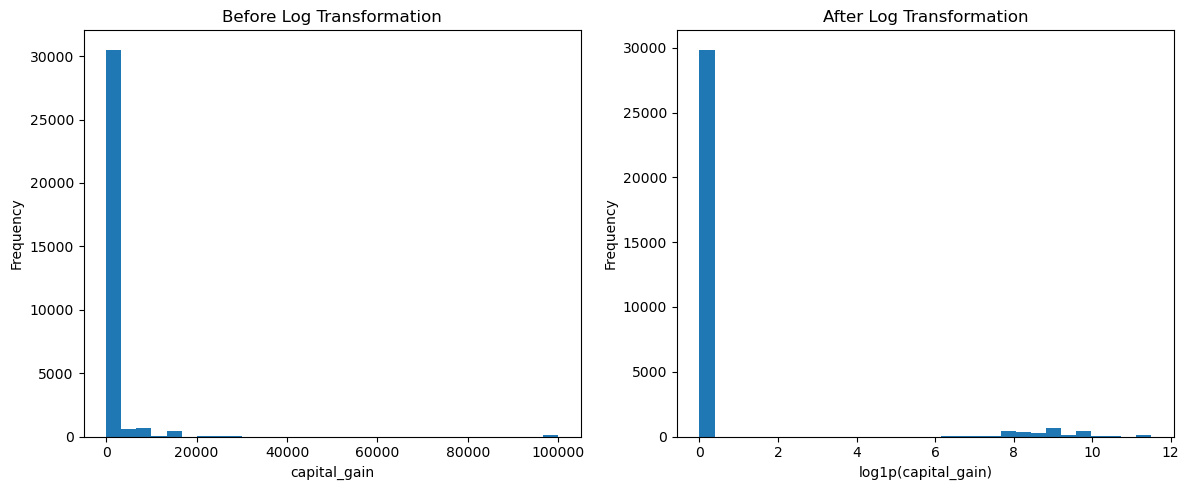

In [57]:
import matplotlib.pyplot as plt
import numpy as np

feature = 'capital_gain'

# Create log-transformed feature (safe for zeros)
df['capital_gain_log'] = np.log1p(df[feature])

# Plot histograms side by side
plt.figure(figsize=(12,5))

# BEFORE transformation
plt.subplot(1,2,1)
plt.hist(df[feature], bins=30)
plt.title("Before Log Transformation")
plt.xlabel(feature)
plt.ylabel("Frequency")

# AFTER transformation
plt.subplot(1,2,2)
plt.hist(df['capital_gain_log'], bins=30)
plt.title("After Log Transformation")
plt.xlabel("log1p(" + feature + ")")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()